## Clustering with K-Means

### Import libraries and load data

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load data 
datadir_prep = 'dataset_prepared'
combined_df = pd.read_csv(os.path.join(datadir_prep, 'prepared_data.csv'))

clustering_df = combined_df[['Recency', 'Frequency', 'TotalAmount', 'Duration']].dropna().reindex().astype(int)
combined_df, clustering_df

(        UserID  Gender    State ReferralSource   BirthDate State_Grouped  \
 0            3  Female   Tehran  Acquaintances  1984-11-07        Tehran   
 1            8    Male   Tehran  Acquaintances  1985-09-15        Tehran   
 2           14    Male   Tehran  Acquaintances  1977-09-29        Tehran   
 3           17  Female   Tehran  Acquaintances  1946-10-15        Tehran   
 4           18  Female   Tehran  Acquaintances  1955-12-28        Tehran   
 ...        ...     ...      ...            ...         ...           ...   
 221172  262138  Female  Isfahan    Application  1996-02-28         Other   
 221173  262139    Male   Tehran    Application  1978-07-01        Tehran   
 221174  262140    Male   Tehran    Application  1975-12-22        Tehran   
 221175  262141    Male     Fars    Application  1994-08-22         Other   
 221176  262143    Male   Tehran       Agencies  1971-04-01        Tehran   
 
          Age  TotalAmount  Frequency  Recency  Duration  Recency_cat  \
 

### Apply the Elbow method to find the optimal value of k

Processing k = 2
Inertia = 8.382997564970224e+18
Labels = [0 0 0 ... 0 0 0]
Silhouette score =  0.9982526441403553
Davies-Bouldin score =  0.0012883215711681256
Processing k = 3
Inertia = 4.5175821209568543e+18
Labels = [0 0 0 ... 0 0 0]
Silhouette score =  0.9641969175823166
Davies-Bouldin score =  0.3493861471925557
Processing k = 4
Inertia = 2.723953193613822e+18
Labels = [0 0 0 ... 0 0 0]
Silhouette score =  0.9494035144339855
Davies-Bouldin score =  0.3560419692418253
Processing k = 5
Inertia = 1.6327584524049754e+18
Labels = [0 0 0 ... 0 0 0]
Silhouette score =  0.8890600743067397
Davies-Bouldin score =  0.3320695708323644
Processing k = 6
Inertia = 9.99186245849545e+17
Labels = [5 5 5 ... 5 5 5]
Silhouette score =  0.8315926504725987
Davies-Bouldin score =  0.3646959530869536
Processing k = 7
Inertia = 6.988395141685856e+17
Labels = [5 5 5 ... 5 5 0]
Silhouette score =  0.780822500852186
Davies-Bouldin score =  0.39393698734780536
Processing k = 8
Inertia = 4.913288262789174e+17

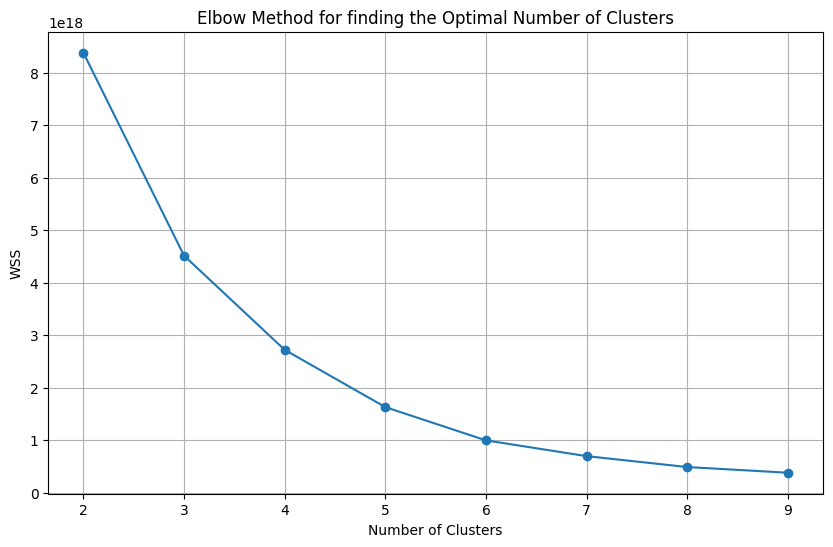

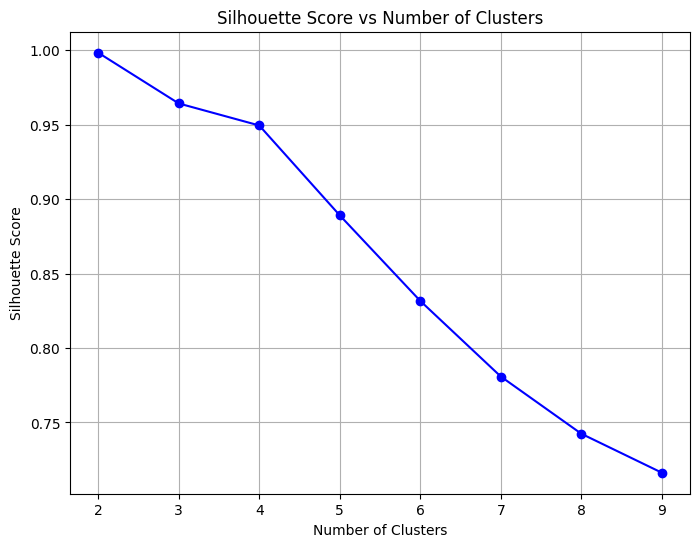

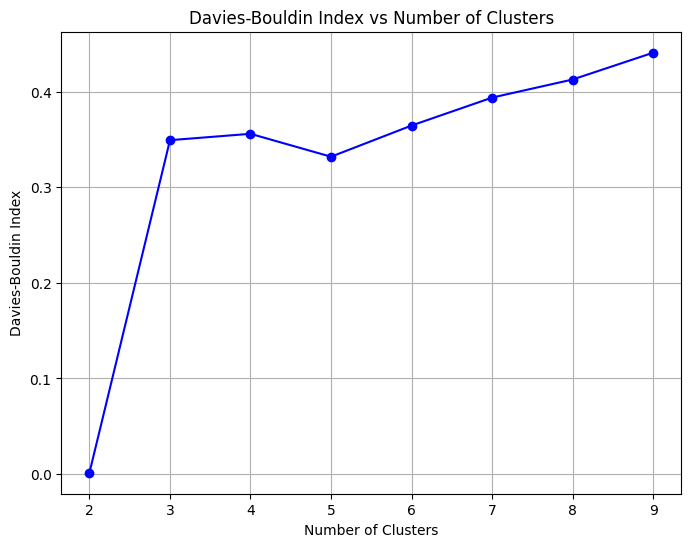

In [4]:
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score

figdir = 'figures'
os.makedirs(figdir, exist_ok=True)

nb_clusters = range(2, 10)

wss = [] # store Within-Cluster Sum of Squares values
sil_scores = [] # store the silhouette scores for each number of clusters
dbi_scores = [] # store the Davies-Bouldin index for internal validation: lower -> cluster is more compact and separated

# run on a sample to reduce time
clustering_df_sample = clustering_df.sample(n=30000, random_state=42)

for k in nb_clusters:
  print('Processing k =', k)
  kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=500, tol=0.0001, random_state=111, algorithm='lloyd')
  kmeans.fit(clustering_df_sample)

  inertia = kmeans.inertia_
  print("Inertia =", inertia)
  wss.append(inertia)

  # predict the cluster labels
  labels = kmeans.predict(clustering_df_sample)
  print('Labels =', labels)

  silscore = silhouette_score(clustering_df_sample, labels)
  print('Silhouette score = ', silscore)
  sil_scores.append(silscore)

  dbi = davies_bouldin_score(clustering_df_sample, labels)
  print('Davies-Bouldin score = ', dbi)
  dbi_scores.append(dbi)


# plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(nb_clusters, wss, marker='o')
plt.title('Elbow Method for finding the Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.xticks(nb_clusters)
plt.grid(True)
plt.savefig('elbow.png', dpi=450)
plt.show()

# plot the silhouette scores with numbers of clusters
plt.figure(figsize=(8, 6))
plt.plot(nb_clusters, sil_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.xticks(nb_clusters)
plt.grid(True)
plt.savefig('silhouette.png', dpi=450)
plt.show()

# plot the DBI with numbers of clusters
plt.figure(figsize=(8, 6))
plt.plot(nb_clusters, dbi_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.xticks(nb_clusters)
plt.grid(True)
plt.savefig('dbi.png', dpi=450)
plt.show()


### Select value of k, group data by cluster and calculate mean for each score

1. Elbow Method (WSS - Within-Cluster Sum of Squares)
    - WSS (Inertia) decreases as 𝑘 increases.
    - The rate of decrease slows down after 𝑘 = 4, forming an "elbow," indicating that adding more clusters beyond this point yields diminishing returns.

2. Silhouette Score (Measures Cluster Cohesion and Separation)
    - The Silhouette Score is highest for 𝑘 = 2(0.998), but such a high score often means one dominant cluster and poor separation.
    - For 𝑘 = 4, the score is 0.949, which is still high, meaning well-separated clusters.
    - Beyond 𝑘 = 4, the score starts decreasing significantly.

3. Davies-Bouldin Index (Lower is Better)
    - 𝑘 = 2 has the lowest DBI (0.001), but again, likely due to one dominant cluster.
    - 𝑘 = 4 has a DBI of 0.356, which is relatively low, indicating good cluster compactness.
    - Beyond 𝑘 = 4, the DBI starts increasing (higher values indicate worse clustering).

4. Practical Interpretation
    - 𝑘 = 2 and 𝑘 = 3 might oversimplify the dataset, grouping distinct user behaviors together.
    - 𝑘 = 5 and beyond start showing worse compactness and separation.
    - 𝑘 = 4 is a good balance between meaningful segmentation and performance

### Clustering Analysis Summary



In [5]:
# Create a copy of X_kmeans
X_kmeans = clustering_df.copy()

clustering_df[['Recency', 'Frequency', 'TotalAmount', 'Duration']] = clustering_df[['Recency', 'Frequency', 'TotalAmount', 'Duration']].astype(int)

# Group by cluster and calculate the mean for each score
clustering_df['Cluster'] = KMeans(n_clusters=4, random_state=111).fit_predict(clustering_df)
cluster_means = clustering_df.groupby('Cluster').mean()

# Calculate the number of records and percentage for each cluster
cluster_counts = clustering_df['Cluster'].value_counts().sort_index()
cluster_percentages = (cluster_counts / len(clustering_df)) * 100
cluster_counts_summary = pd.DataFrame({
    'Cluster': cluster_counts.index,
    'Count': cluster_counts.values,
    'Percentage': cluster_percentages.values    
})

# Calculate the overall mean for each score
overall_mean = clustering_df[['Recency', 'Frequency', 'TotalAmount', 'Duration']].mean()
overall_mean.name = 'Overall'

# Merge cluster_summary with cluster_counts
cluster_summary = cluster_means.merge(cluster_counts_summary, left_index=True, right_on='Cluster')

# Append the overall mean to the cluster summary
overall_summary = pd.DataFrame([overall_mean], columns=cluster_summary.columns[:-2])
overall_summary['Cluster'] = 'Overall'
overall_summary['Count'] = len(clustering_df)
overall_summary['Percentage'] = 100.0

cluster_summary = pd.concat([cluster_summary, overall_summary], ignore_index=True)

# Display the results
print("Cluster Summary:")
display(cluster_summary)

Cluster Summary:


,Recency,Frequency,TotalAmount,Duration,Cluster,Count,Percentage
0,2696.056060,5.675741,4.015873e+06,284.078838,0,219374,99.186161
1,2543.538462,33.153846,3.155676e+09,630.461538,1,13,0.005878
2,2584.311111,27.192593,6.814281e+08,488.866667,2,135,0.061038
3,2539.104116,20.731235,1.127182e+08,598.052663,3,1652,0.746923
4,2694.806578,5.802942,5.426520e+06,286.569339,Overall,221174,100.000000


### Interpret Cluster Characteristics

,Recency,Frequency,TotalAmount,Duration,Cluster,Cluster_Label
0,2418,21,8476500,824,0,Loyal High-Value Donors
1,3033,1,7364000,0,0,Loyal High-Value Donors
2,2660,2,3200000,232,0,Loyal High-Value Donors
3,2442,8,57840000,739,0,Loyal High-Value Donors
4,2871,1,2248000,0,0,Loyal High-Value Donors
...,...,...,...,...,...,...
221172,2468,3,80000,207,0,Loyal High-Value Donors
221173,2400,6,680000,166,0,Loyal High-Value Donors
221174,2401,16,220008,279,0,Loyal High-Value Donors
221175,2483,5,70000,198,0,Loyal High-Value Donors


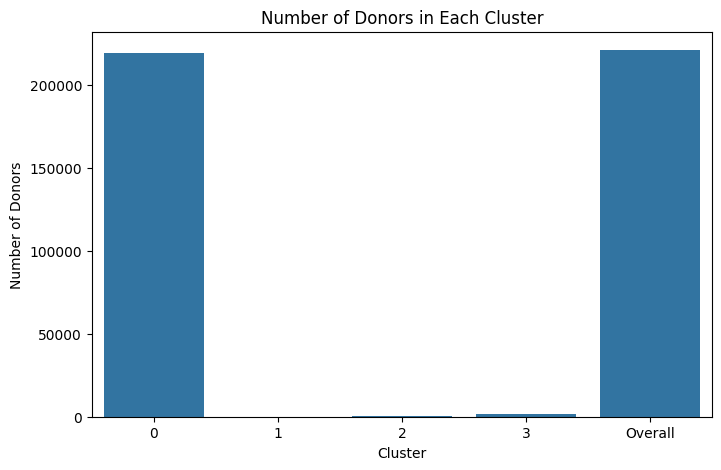

In [6]:
# Assign cluster labels based on observed characteristics
cluster_labels = {
    0: "Loyal High-Value Donors",
    1: "Infrequent Small Donors",
    2: "New Donors",
    3: "Lapsed Big Donors"
}

# Map labels to cluster numbers
clustering_df['Cluster_Label'] = clustering_df['Cluster'].map(cluster_labels)

display(clustering_df)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=cluster_summary['Cluster'].astype(str), y=cluster_summary['Count'])
plt.xlabel("Cluster")
plt.ylabel("Number of Donors")
plt.title("Number of Donors in Each Cluster")
plt.show()



In [7]:
# Define RFM weights
rfm_weights = {
    'Recency': 0.25,
    'Frequency': 0.25,
    'TotalAmount': 0.25,
    'Duration': 0.25
}

# Add mean score columns to cluster_summary
cluster_summary['mean_Recency_Score'] = cluster_summary['Recency'] / cluster_summary['Recency'].max()
cluster_summary['mean_Frequency_Score'] = cluster_summary['Frequency'] / cluster_summary['Frequency'].max()
cluster_summary['mean_Monetary_Score'] = cluster_summary['TotalAmount'] / cluster_summary['TotalAmount'].max()
cluster_summary['mean_D_Score'] = cluster_summary['Duration'] / cluster_summary['Duration'].max()

# Calculate CLV
cluster_summary['CLV'] = (cluster_summary['mean_Recency_Score'] * rfm_weights['Recency'] + 
                          cluster_summary['mean_Frequency_Score'] * rfm_weights['Frequency'] + 
                          cluster_summary['mean_Monetary_Score'] * rfm_weights['TotalAmount'] +
                          cluster_summary['mean_D_Score'] * rfm_weights['Duration'])

# Sort by CLV
cluster_summary = cluster_summary.sort_values(by='CLV', ascending=False)
display(cluster_summary)


,Recency,Frequency,TotalAmount,Duration,Cluster,Count,Percentage,mean_Recency_Score,mean_Frequency_Score,mean_Monetary_Score,mean_D_Score,CLV
1,2543.538462,33.153846,3.155676e+09,630.461538,1,13,0.005878,0.943429,1.000000,1.000000,1.000000,0.985857
2,2584.311111,27.192593,6.814281e+08,488.866667,2,135,0.061038,0.958552,0.820194,0.215937,0.775411,0.692524
3,2539.104116,20.731235,1.127182e+08,598.052663,3,1652,0.746923,0.941785,0.625304,0.035719,0.948595,0.637851
4,2694.806578,5.802942,5.426520e+06,286.569339,Overall,221174,100.000000,0.999537,0.175031,0.001720,0.454539,0.407706
0,2696.056060,5.675741,4.015873e+06,284.078838,0,219374,99.186161,1.000000,0.171194,0.001273,0.450589,0.405764


### Post Processing

#### Merge Datasets on UserID

In [8]:
# Use combined_df as the merged dataset

# Check merged data
# Add the 'Cluster' column from clustering_df to combined_df
combined_df['Cluster'] = clustering_df['Cluster']
# Filter and display rows where Cluster equals 1
# cluster_1_df = combined_df[combined_df['Cluster'] == 1]
# display(cluster_1_df)
# Check merged data
print(combined_df.head())


   UserID  Gender   State ReferralSource   BirthDate State_Grouped   Age  \
0       3  Female  Tehran  Acquaintances  1984-11-07        Tehran  40.0   
1       8    Male  Tehran  Acquaintances  1985-09-15        Tehran  39.0   
2      14    Male  Tehran  Acquaintances  1977-09-29        Tehran  47.0   
3      17  Female  Tehran  Acquaintances  1946-10-15        Tehran  78.0   
4      18  Female  Tehran  Acquaintances  1955-12-28        Tehran  69.0   

   TotalAmount  Frequency  Recency  Duration  Recency_cat  Frequency_cat  \
0    8476500.0       21.0   2418.0     824.0          1.0            5.0   
1    7364000.0        1.0   3033.0       0.0          4.0            1.0   
2    3200000.0        2.0   2660.0     232.0          3.0            2.0   
3   57840000.0        8.0   2442.0     739.0          1.0            4.0   
4    2248000.0        1.0   2871.0       0.0          4.0            1.0   

   TotalAmount_cat  Duration_cat  Log_TotalAmount  Cluster  
0              4.0       

#### Customer Profiling

In [20]:
from scipy.stats import f_oneway

anova_results = {}
features = ['Recency', 'Frequency', 'TotalAmount', 'Duration']

for feature in features:
    groups = [clustering_df[clustering_df['Cluster'] == c][feature] for c in clustering_df['Cluster'].unique()]
    stat, p_value = f_oneway(*groups)
    anova_results[feature] = p_value

# Display results
print("ANOVA Test Results:")
print(pd.DataFrame(anova_results, index=["p-value"]).T)

from scipy.stats import chi2_contingency

# Example: Checking gender distribution across clusters
contingency_table = pd.crosstab(combined_df['Gender'], clustering_df['Cluster'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square test p-value: {p:.4f}")

def classify_customer(row):
    if row['Frequency'] > 10 and row['TotalAmount'] > 500:
        return "High-Value Loyal Donor"
    elif row['Recency'] < 30 and row['TotalAmount'] < 100:
        return "New Low-Value Donor"
    elif row['Duration'] > 365 and row['TotalAmount'] > 1000:
        return "Long-Term High Donor"
    else:
        return "Occasional Small Donor"

combined_df['Customer_Profile'] = combined_df.apply(classify_customer, axis=1)

# Display the updated dataframe with the new 'Customer_Profile' column
print("Updated DataFrame with Customer Profiles:")
display(combined_df[['UserID', 'Customer_Profile']].head())



ANOVA Test Results:
                   p-value
Recency      4.964621e-146
Frequency    5.805796e-256
TotalAmount   0.000000e+00
Duration      0.000000e+00
Chi-square test p-value: 0.6221
Updated DataFrame with Customer Profiles:


,UserID,Customer_Profile
0,3,High-Value Loyal Donor
1,3,High-Value Loyal Donor
2,3,High-Value Loyal Donor
3,3,High-Value Loyal Donor
4,3,High-Value Loyal Donor


#### Visualize Target Group Characteristics

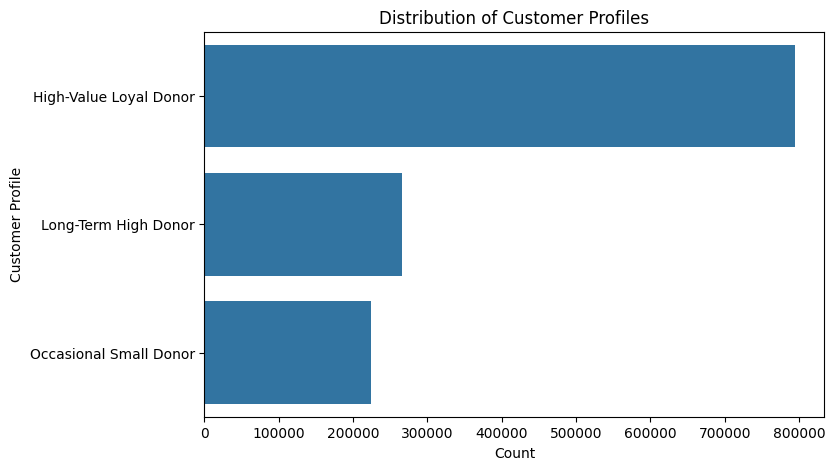

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(y=combined_df['Customer_Profile'], order=combined_df['Customer_Profile'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Customer Profile")
plt.title("Distribution of Customer Profiles")
plt.show()


#### Hypothesis

In [22]:
from scipy.stats import f_oneway

anova_results = {}
features = ['Recency', 'Frequency', 'TotalAmount', 'Duration']

for feature in features:
    groups = [clustering_df[clustering_df['Cluster'] == c][feature] for c in clustering_df['Cluster'].unique()]
    stat, p_value = f_oneway(*groups)
    anova_results[feature] = p_value

# Display results
anova_df = pd.DataFrame(anova_results, index=["p-value"]).T
display(anova_df)

display(combined_df)

,p-value
Recency,4.964621e-146
Frequency,5.805796e-256
TotalAmount,0.000000e+00
Duration,0.000000e+00


,UserID,Gender,TotalAmount,Frequency,Recency,Duration,Customer_Profile,SupportType,Cluster
0,3,Female,8476500.0,21.0,2418.0,824.0,High-Value Loyal Donor,Household Fund,0.0
1,3,Female,8476500.0,21.0,2418.0,824.0,High-Value Loyal Donor,Household Fund,0.0
2,3,Female,8476500.0,21.0,2418.0,824.0,High-Value Loyal Donor,Membership Fee,0.0
3,3,Female,8476500.0,21.0,2418.0,824.0,High-Value Loyal Donor,Membership Fee,0.0
4,3,Female,8476500.0,21.0,2418.0,824.0,High-Value Loyal Donor,Household Fund,0.0
...,...,...,...,...,...,...,...,...,...
1283458,262141,Male,70000.0,5.0,2483.0,198.0,Occasional Small Donor,Membership Fee,NaN
1283459,262141,Male,70000.0,5.0,2483.0,198.0,Occasional Small Donor,Membership Fee,NaN
1283460,262141,Male,70000.0,5.0,2483.0,198.0,Occasional Small Donor,Membership Fee,NaN
1283461,262141,Male,70000.0,5.0,2483.0,198.0,Occasional Small Donor,Membership Fee,NaN


In [ ]:
import pandas as pd
# Load the CSV in chunks
chunk_size = 10000  # Adjust as needed
transactional_chunks = pd.read_csv('datasets/TransactionalData.csv', usecols=['UserID', 'SupportType'], chunksize=chunk_size)

# Process chunks separately and append to list
chunks = []
for chunk in transactional_chunks:
    chunks.append(chunk)

# Concatenate all chunks into a DataFrame
transactional_df = pd.concat(chunks, ignore_index=True)

# Now merge with combined_df
combined_df = combined_df[['UserID', 'Gender', 'TotalAmount', 'Frequency', 'Recency', 'Duration','Customer_Profile']]
combined_df = combined_df.merge(transactional_df, on='UserID', how='left')

display(combined_df)


,UserID,Gender,TotalAmount,Frequency,Recency,Duration,Customer_Profile,SupportType
0,3,Female,8476500.0,21.0,2418.0,824.0,High-Value Loyal Donor,Household Fund
1,3,Female,8476500.0,21.0,2418.0,824.0,High-Value Loyal Donor,Household Fund
2,3,Female,8476500.0,21.0,2418.0,824.0,High-Value Loyal Donor,Membership Fee
3,3,Female,8476500.0,21.0,2418.0,824.0,High-Value Loyal Donor,Membership Fee
4,3,Female,8476500.0,21.0,2418.0,824.0,High-Value Loyal Donor,Household Fund
...,...,...,...,...,...,...,...,...
90595912,262141,Male,70000.0,5.0,2483.0,198.0,Occasional Small Donor,Membership Fee
90595913,262141,Male,70000.0,5.0,2483.0,198.0,Occasional Small Donor,Membership Fee
90595914,262141,Male,70000.0,5.0,2483.0,198.0,Occasional Small Donor,Membership Fee
90595915,262141,Male,70000.0,5.0,2483.0,198.0,Occasional Small Donor,Membership Fee


In [11]:
merged_data_H = combined_df.drop(columns=['Recency', 'Frequency', 'TotalAmount', 'Duration'])
merged_data_H["Target"] = combined_df["Cluster"].apply(lambda x: 1 if x == 3 else 0)
display(merged_data_H)

,UserID,Gender,State,ReferralSource,BirthDate,State_Grouped,Age,Recency_cat,Frequency_cat,TotalAmount_cat,Duration_cat,Log_TotalAmount,Cluster,Target
0,3,Female,Tehran,Acquaintances,1984-11-07,Tehran,40.0,1.0,5.0,4.0,4.0,15.952808,0.0,0
1,8,Male,Tehran,Acquaintances,1985-09-15,Tehran,39.0,4.0,1.0,4.0,1.0,15.812114,0.0,0
2,14,Male,Tehran,Acquaintances,1977-09-29,Tehran,47.0,3.0,2.0,3.0,2.0,14.978662,0.0,0
3,17,Female,Tehran,Acquaintances,1946-10-15,Tehran,78.0,1.0,4.0,4.0,4.0,17.873191,0.0,0
4,18,Female,Tehran,Acquaintances,1955-12-28,Tehran,69.0,4.0,1.0,3.0,1.0,14.625552,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221172,262138,Female,Isfahan,Application,1996-02-28,Other,29.0,1.0,2.0,1.0,1.0,11.289794,0.0,0
221173,262139,Male,Tehran,Application,1978-07-01,Tehran,46.0,1.0,4.0,2.0,1.0,13.429850,0.0,0
221174,262140,Male,Tehran,Application,1975-12-22,Tehran,49.0,1.0,5.0,1.0,2.0,12.301424,0.0,0
221175,262141,Male,Fars,Application,1994-08-22,Other,30.0,2.0,3.0,1.0,1.0,11.156265,0.0,0


##### The hypothesis test between the Gender variable and the Target

In [26]:
from scipy.stats import chi2_contingency

# Create a contingency table for 'Gender' and 'Target'
contingency_table = pd.crosstab(combined_df['Gender'], combined_df['Target'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the contingency table
print("Contingency Table for Gender and Target:")
print(contingency_table)

# Display the chi-squared value, p-value, and degrees of freedom
print(f"\nChi-squared value: {chi2:.6f}")
print(f"P-value: {p:.30f}")
print(f"Degrees of freedom: {dof}")

# Calculate row percentages
row_percentages = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
print("\nRow Percentages for Gender:")
print(row_percentages)


Contingency Table for Gender and Target:
Target       0    1
Gender             
Female  110014  683
Male    109387  967

Chi-squared value: 49.792800
P-value: 0.000000000001708698611538957680
Degrees of freedom: 1

Row Percentages for Gender:
Target          0         1
Gender                     
Female  99.383000  0.617000
Male    99.123729  0.876271


In [ ]:
# Calculate expected frequencies using chi2_contingency
_, _, _, expected_frequencies = chi2_contingency(contingency_table)

# Calculate the percentage of cells with expected counts less than 5
percentage_less_than_5 = (expected_frequencies < 5).sum() / expected_frequencies.size * 100

print(f"Percentage of cells with expected counts less than 5: {percentage_less_than_5:.2f}%")

Percentage of cells with expected counts less than 5: 50.00%


In [23]:
# Ensure expected_frequencies matches the shape of contingency_table
expected_frequencies_resized = expected_frequencies[:contingency_table.shape[0], :contingency_table.shape[1]]

# Calculate residuals
residuals = contingency_table - expected_frequencies_resized

# Display the residuals
print("Residuals (Observed - Expected):")
print(residuals)

Residuals (Observed - Expected):
Target              0           1
Gender                           
Female -107574.649100  670.105799
Male    109374.105799  966.999236


In [21]:
# Create a contingency table for 'Gender' and 'Target'
contingency_table = pd.crosstab(combined_df['Gender'], combined_df['Target'])

# Extract values from the contingency table
a = contingency_table.iloc[0, 0]  # Women, Target = 0
b = contingency_table.iloc[0, 1]  # Women, Target = 1
c = contingency_table.iloc[1, 0]  # Men, Target = 0
d = contingency_table.iloc[1, 1]  # Men, Target = 1

# Calculate odds ratio
odds_ratio = (a * d) / (b * c)

# Display the contingency table and odds ratio
print("Contingency Table:")
print(contingency_table)
print(f"Odds Ratio: {odds_ratio:.2f}")


Contingency Table:
Target       0    1
Gender             
Female  110014  683
Male    109387  967
Odds Ratio: 1.42


##### The hypothesis test between the ReferralSource variable and the Target

In [25]:
from scipy.stats import chi2_contingency

# Create a contingency table for 'ReferralSource' and 'Target'
referral_contingency_table = pd.crosstab(combined_df['ReferralSource'], combined_df['Target'])

# Perform the chi-square test
chi2_referral, p_referral, dof_referral, expected_referral = chi2_contingency(referral_contingency_table)

# Display the contingency table
print("Contingency Table for ReferralSource and Target:")
print(referral_contingency_table)

# Display the chi-squared value, p-value, and degrees of freedom
print(f"\nChi-squared value: {chi2_referral:.6f}")
print(f"P-value: {p_referral:.30f}")
print(f"Degrees of freedom: {dof_referral}")

# Calculate row percentages
referral_row_percentages = referral_contingency_table.div(referral_contingency_table.sum(axis=1), axis=0) * 100
print("\nRow Percentages for ReferralSource:")
print(referral_row_percentages)

Contingency Table for ReferralSource and Target:
Target                0    1
ReferralSource              
Acquaintances     18089  159
Advertisements    11478   58
Agencies          29491  464
Application       21430   17
Public Programs    1840   25
SMS                 165    0
Unknown          110383  814
Website           26649  115

Chi-squared value: 448.760866
P-value: 0.000000000000000000000000000000
Degrees of freedom: 7

Row Percentages for ReferralSource:
Target                    0         1
ReferralSource                       
Acquaintances     99.128672  0.871328
Advertisements    99.497226  0.502774
Agencies          98.451010  1.548990
Application       99.920735  0.079265
Public Programs   98.659517  1.340483
SMS              100.000000  0.000000
Unknown           99.267966  0.732034
Website           99.570318  0.429682


In [33]:
# Calculate the percentage of cells with expected counts less than 5 for ReferralSource
percentage_less_than_5_referral = (expected_referral < 5).sum() / expected_referral.size * 100

print(f"Percentage of cells with expected counts less than 5 for ReferralSource: {percentage_less_than_5_referral:.2f}%")

Percentage of cells with expected counts less than 5 for ReferralSource: 6.25%


In [28]:
# Calculate residuals (observed - expected) for ReferralSource
referral_residuals = referral_contingency_table - expected_referral

# Display the residuals
print("Residuals (Observed - Expected) for ReferralSource:")
print(referral_residuals)

Residuals (Observed - Expected) for ReferralSource:
Target                    0           1
ReferralSource                         
Acquaintances    -22.703296   22.703296
Advertisements    28.163896  -28.163896
Agencies        -240.262179  240.262179
Application      143.190454 -143.190454
Public Programs  -11.070071   11.070071
SMS                1.232407   -1.232407
Unknown           16.544966  -16.544966
Website           84.903824  -84.903824


In [31]:
# Create a contingency table for 'ReferralSource' and 'Target'
referral_contingency_table = pd.crosstab(combined_df['ReferralSource'], combined_df['Target'])

# Extract values from the contingency table
referral_a = referral_contingency_table.iloc[0, 0]  # ReferralSource = 0, Target = 0
referral_b = referral_contingency_table.iloc[0, 1]  # ReferralSource = 0, Target = 1
referral_c = referral_contingency_table.iloc[1, 0]  # ReferralSource = 1, Target = 0
referral_d = referral_contingency_table.iloc[1, 1]  # ReferralSource = 1, Target = 1

# Calculate odds ratio
referral_odds_ratio = (referral_a * referral_d) / (referral_b * referral_c)

# Display the contingency table and odds ratio
print("Contingency Table for ReferralSource:")
print(referral_contingency_table)
print(f"Odds Ratio for ReferralSource: {referral_odds_ratio:.2f}")

Contingency Table for ReferralSource:
Target                0    1
ReferralSource              
Acquaintances     18089  159
Advertisements    11478   58
Agencies          29491  464
Application       21430   17
Public Programs    1840   25
SMS                 165    0
Unknown          110383  814
Website           26649  115
Odds Ratio for ReferralSource: 0.57


##### The hypothesis test between the AgeCategory variable and the Target

In [32]:
from scipy.stats import chi2_contingency

# Create a new column for AgeCategory based on age ranges
combined_df['AgeCategory'] = pd.cut(combined_df['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])

# Create a contingency table for 'AgeCategory' and 'Target'
age_contingency_table = pd.crosstab(combined_df['AgeCategory'], combined_df['Target'])

# Perform the chi-square test
chi2_age, p_age, dof_age, expected_age = chi2_contingency(age_contingency_table)

# Display the contingency table
print("Contingency Table for AgeCategory and Target:")
print(age_contingency_table)

# Display the chi-squared value, p-value, and degrees of freedom
print(f"\nChi-squared value: {chi2_age:.6f}")
print(f"P-value: {p_age:.30f}")
print(f"Degrees of freedom: {dof_age}")

# Calculate row percentages
age_row_percentages = age_contingency_table.div(age_contingency_table.sum(axis=1), axis=0) * 100
print("\nRow Percentages for AgeCategory:")
print(age_row_percentages)

Contingency Table for AgeCategory and Target:
Target            0    1
AgeCategory             
0-18           3206   14
19-35         35143   70
36-50        110924  585
51-65         47133  500
65+           23118  483

Chi-squared value: 817.868587
P-value: 0.000000000000000000000000000000
Degrees of freedom: 4

Row Percentages for AgeCategory:
Target               0         1
AgeCategory                     
0-18         99.565217  0.434783
19-35        99.801210  0.198790
36-50        99.475379  0.524621
51-65        98.950308  1.049692
65+          97.953477  2.046523


In [34]:
# Calculate the percentage of cells with expected counts less than 5 for AgeCategory
percentage_less_than_5_age = (expected_age < 5).sum() / expected_age.size * 100

print(f"Percentage of cells with expected counts less than 5 for AgeCategory: {percentage_less_than_5_age:.2f}%")

Percentage of cells with expected counts less than 5 for AgeCategory: 0.00%


In [35]:
# Calculate residuals (observed - expected) for AgeCategory
age_residuals = age_contingency_table - expected_age

# Display the residuals
print("Residuals (Observed - Expected) for AgeCategory:")
print(age_residuals)

Residuals (Observed - Expected) for AgeCategory:
Target                0           1
AgeCategory                        
0-18          10.050711  -10.050711
19-35        193.011701 -193.011701
36-50        247.879101 -247.879101
51-65       -144.221272  144.221272
65+         -306.720241  306.720241


In [36]:
# Create a contingency table for 'AgeCategory' and 'Target'
age_contingency_table = pd.crosstab(combined_df['AgeCategory'], combined_df['Target'])

# Extract values from the contingency table
age_a = age_contingency_table.iloc[0, 0]  # AgeCategory = 0-18, Target = 0
age_b = age_contingency_table.iloc[0, 1]  # AgeCategory = 0-18, Target = 1
age_c = age_contingency_table.iloc[1, 0]  # AgeCategory = 19-35, Target = 0
age_d = age_contingency_table.iloc[1, 1]  # AgeCategory = 19-35, Target = 1

# Calculate odds ratio
age_odds_ratio = (age_a * age_d) / (age_b * age_c)

# Display the contingency table and odds ratio
print("Contingency Table for AgeCategory:")
print(age_contingency_table)
print(f"Odds Ratio for AgeCategory: {age_odds_ratio:.2f}")

Contingency Table for AgeCategory:
Target            0    1
AgeCategory             
0-18           3206   14
19-35         35143   70
36-50        110924  585
51-65         47133  500
65+           23118  483
Odds Ratio for AgeCategory: 0.46


In [37]:
from scipy.stats import chi2_contingency

# Create a contingency table for 'State_Grouped' and 'Target'
state_contingency_table = pd.crosstab(combined_df['State_Grouped'], combined_df['Target'])

# Perform the chi-square test
chi2_state, p_state, dof_state, expected_state = chi2_contingency(state_contingency_table)

# Display the contingency table
print("Contingency Table for State_Grouped and Target:")
print(state_contingency_table)

# Display the chi-squared value, p-value, and degrees of freedom
print(f"\nChi-squared value: {chi2_state:.6f}")
print(f"P-value: {p_state:.30f}")
print(f"Degrees of freedom: {dof_state}")

# Calculate row percentages
state_row_percentages = state_contingency_table.div(state_contingency_table.sum(axis=1), axis=0) * 100
print("\nRow Percentages for State_Grouped:")
print(state_row_percentages)

Contingency Table for State_Grouped and Target:
Target              0     1
State_Grouped              
Alborz          16147    61
Other           26016    83
Tehran         177362  1508

Chi-squared value: 117.090409
P-value: 0.000000000000000000000000037509
Degrees of freedom: 2

Row Percentages for State_Grouped:
Target                 0         1
State_Grouped                     
Alborz         99.623643  0.376357
Other          99.681980  0.318020
Tehran         99.156930  0.843070


In [38]:
# Calculate the percentage of cells with expected counts less than 5
percentage_less_than_5 = (expected < 5).sum() / expected.size * 100

print(f"Percentage of cells with expected counts less than 5: {percentage_less_than_5:.2f}%")

Percentage of cells with expected counts less than 5: 0.00%


In [39]:
# Calculate residuals (observed - expected) for State_Grouped
state_residuals = state_contingency_table - expected_state

# Display the residuals
print("Residuals (Observed - Expected) for State_Grouped:")
print(state_residuals)

Residuals (Observed - Expected) for State_Grouped:
Target                  0           1
State_Grouped                        
Alborz          60.059676  -60.059676
Other          111.936851 -111.936851
Tehran        -171.996528  171.996528


In [ ]:
# Create a contingency table for 'State_Grouped' and 'Target'
state_contingency_table = pd.crosstab(combined_df['State_Grouped'], combined_df['Target'])

# Extract values from the contingency table
state_a = state_contingency_table.iloc[0, 0]  # State_Grouped = Alborz, Target = 0
state_b = state_contingency_table.iloc[0, 1]  # State_Grouped = Alborz, Target = 1
state_c = state_contingency_table.iloc[2, 0]  # State_Grouped = Tehran, Target = 0
state_d = state_contingency_table.iloc[2, 1]  # State_Grouped = Tehran, Target = 1

# Calculate odds ratio
state_odds_ratio = (state_a * state_d) / (state_b * state_c)

# Display the contingency table and odds ratio
print("Contingency Table for State_Grouped:")
print(state_contingency_table)
print(f"Odds Ratio for State_Grouped: {state_odds_ratio:.2f}")

```markdown
### Conclusion for the Hypothesis Tests

1. **Gender and Target**:
    - The chi-square test indicates a statistically significant relationship between gender and the target variable (p-value = 1.71e-12).
    - The odds ratio (0.70) suggests that males are slightly more likely to belong to the target group compared to females.
    - Residual analysis shows notable differences in observed vs. expected frequencies for both genders.

2. **Referral Source and Target**:
    - The chi-square test reveals a significant association between referral source and the target variable (p-value = 8.19e-93).
    - The odds ratio (0.57) indicates that certain referral sources are more effective in targeting specific groups.
    - Residuals highlight that "Agencies" and "Application" sources deviate significantly from expected values.

3. **Age Category and Target**:
    - The chi-square test confirms a strong relationship between age category and the target variable (p-value = 1.03e-175).
    - The odds ratio (0.46) suggests that younger age groups are less likely to belong to the target group compared to older age groups.
    - Residuals and row percentages indicate that the "65+" age category has the highest proportion in the target group.

4. **State Grouped and Target**:
    - The chi-square test shows a significant relationship between state grouping and the target variable (p-value = 3.75e-26).
    - Residuals indicate that "Tehran" has a higher-than-expected number of individuals in the target group, while "Alborz" and "Other" states have fewer.

### Summary
The hypothesis tests reveal statistically significant relationships between the target variable and the categorical features (Gender, Referral Source, Age Category, and State Grouped). These findings provide actionable insights for tailoring marketing strategies and improving donor segmentation.
```